<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Sidoney_Daley_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import pandas as pd
import numpy as np


In [0]:
column_headers = ['Age_of_Operation', 'Year_of_Operation', 'Positive_Nodes', 'Survival' ]
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
survival_C = pd.read_csv(url, header=None, names=column_headers)
survival_C.head()

,Age_of_Operation,Year_of_Operation,Positive_Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
survival_C.isnull().sum()

Age_of_Operation     0
Year_of_Operation    0
Positive_Nodes       0
Survival             0
dtype: int64

In [0]:
survival_C.describe

<bound method NDFrame.describe of      Age_of_Operation  Year_of_Operation  Positive_Nodes  Survival
0                  30                 64               1         1
1                  30                 62               3         1
2                  30                 65               0         1
3                  31                 59               2         1
4                  31                 65               4         1
..                ...                ...             ...       ...
301                75                 62               1         1
302                76                 67               0         1
303                77                 65               3         1
304                78                 65               1         2
305                83                 58               2         2

[306 rows x 4 columns]>

In [0]:
survival_d = survival_C.replace({'Survival': 2}, 0)

In [0]:
survival_d.head(10)

,Age_of_Operation,Year_of_Operation,Positive_Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
survival_e = survival_d[['Age_of_Operation', 'Survival']]
survival_e

,Age_of_Operation,Survival
0,30,1
1,30,1
2,30,1
3,31,1
4,31,1
...,...,...
301,75,1
302,76,1
303,77,1
304,78,0


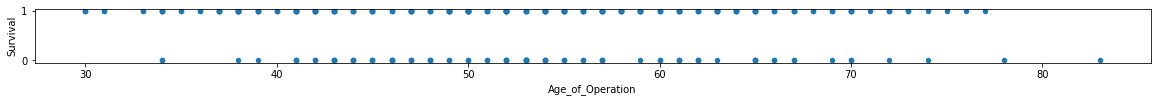

In [0]:
survival_e.plot(kind= 'scatter', x = 'Age_of_Operation', y = 'Survival', figsize=(20,1));
                                                      

In [0]:
NodesAmt_Survival = pd.crosstab(survival_d['Positive_Nodes'], survival_d['Survival'])
NodesAmt_Survival

Survival,0,1
Positive_Nodes,,
0,19,117
1,8,33
2,5,15
3,7,13
4,3,10
5,4,2
6,3,4
7,2,5
8,2,5


In [0]:
nodesbin=[0,15,30,45,60,75]
nodeslabels=['vhigh','high','medium','low','vlow']
survival_d['Positive_Nodes']= pd.cut(survival_d['Positive_Nodes'], bins=nodesbin, labels=nodeslabels)
results = survival_d['Positive_Nodes'].value_counts().sort_index()
results 

vhigh     148
high       19
medium      1
low         2
vlow        0
Name: Positive_Nodes, dtype: int64

In [0]:
NMS = pd.crosstab(survival_d['Positive_Nodes'], survival_d['Survival'])
NMS

Survival,0,1
Positive_Nodes,,
vhigh,50,98
high,10,9
medium,1,0
low,1,1


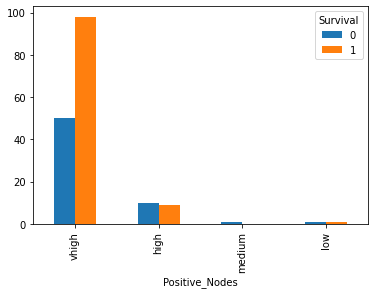

In [0]:
NMS.plot(kind='bar');

In [0]:
YrOp_Survival = pd.crosstab(survival_d['Year_of_Operation'], survival_d['Survival'])
YrOp_Survival

Survival,0,1
Year_of_Operation,,
58,12,24
59,9,18
60,4,24
61,3,23
62,7,16
63,8,22
64,8,23
65,13,15
66,6,22


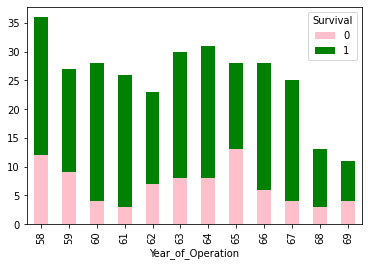

In [0]:
YrOp_Survival.plot(kind='bar', stacked=True, color=['pink', 'green']);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

## My Response



1. One feature that looks to have a positive relationship with survival is having an operation within a certain age range.

2. One feature that looks to have a negative relatiobnship with survial is the number of positive axillary nodes detected.
The lower the amount of positive axillary nodes detected the more likely the chance of survival. 

3. These two features features are related in the context that age and amount of positive axillary nodes detected affects the success rate of an operation.  If you have an operation within a certain age range and a low number of positive auxillary nodes are detected you have a higher chance of surviving.
